In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
data = pd.read_csv("Iris.csv") 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Id                0
SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64


In [9]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data[col].fillna(data[col].mean())
categorical_columns = data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0])

In [11]:
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
Id                0
SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64


In [13]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
print("\nDataset after encoding:")
data.head()


Dataset after encoding:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,NaN,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)
data[numerical_columns] = scaled_data
print("\nDataset after scaling:")
data.head()


Dataset after scaling:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.907294,1.042612,-1.343685,-1.312971,0
1,-1.697448,-1.151938,-0.116747,-1.343685,-1.312971,0
2,-1.674353,-1.396582,0.346997,-1.400136,-1.312971,0
3,-1.651258,NaN,0.115125,-1.287235,-1.312971,0
4,-1.628164,-1.029616,1.274484,-1.343685,-1.312971,0


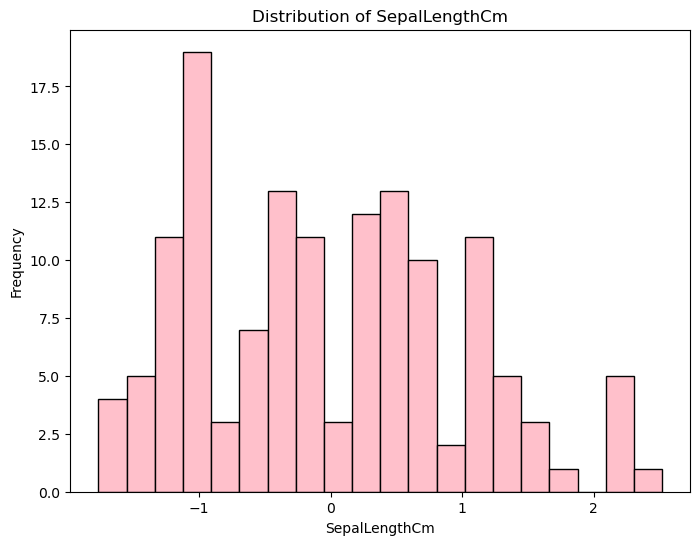

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(data[numerical_columns[1]], bins=20, color='pink', edgecolor='black')
plt.title(f"Distribution of {numerical_columns[1]}")
plt.xlabel(numerical_columns[1])
plt.ylabel("Frequency")
plt.show()

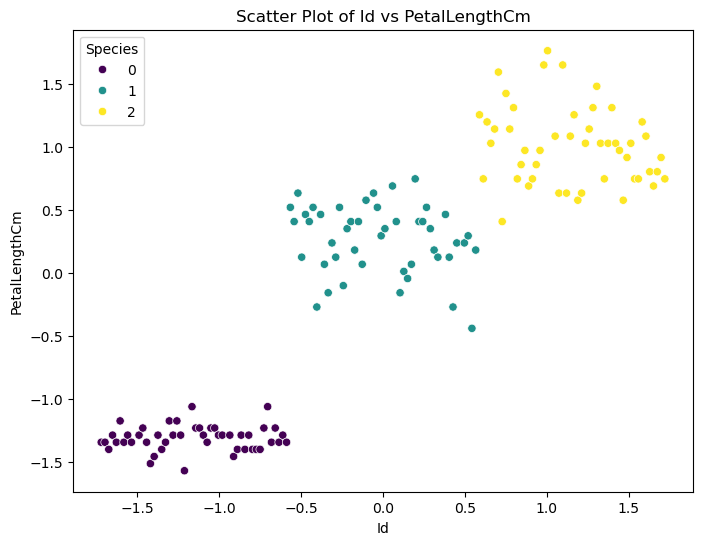

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=numerical_columns[0], y=numerical_columns[3], data=data, hue=categorical_columns[0], palette="viridis")
plt.title(f"Scatter Plot of {numerical_columns[0]} vs {numerical_columns[3]}") 
plt.show()

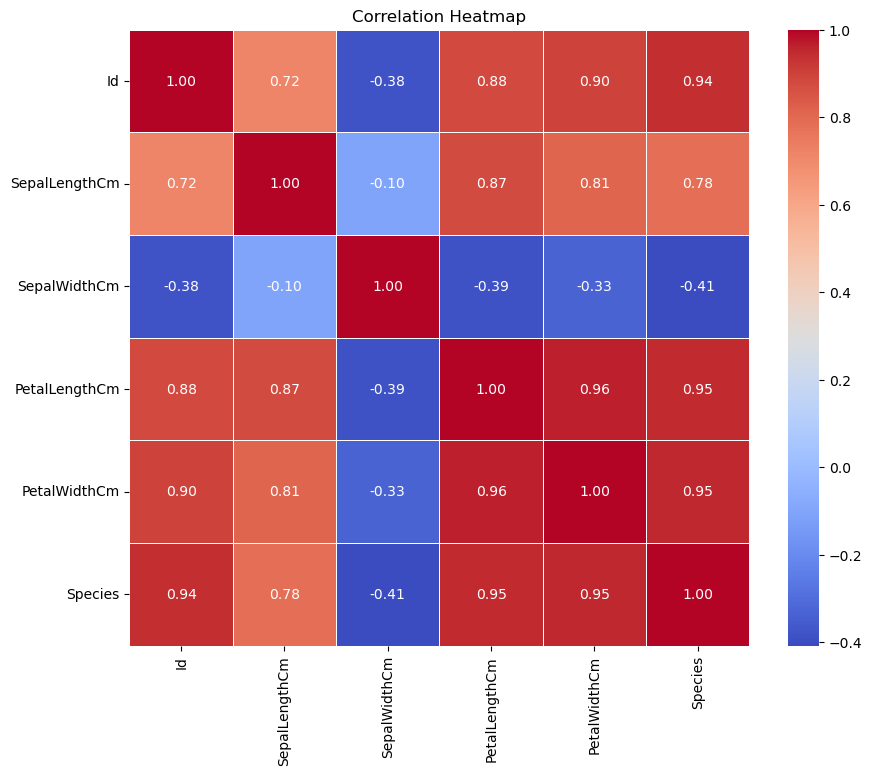

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show() 